# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)

        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.09000000171363354
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.20000000298023224


When finished, you can close the environment.

In [6]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

### 4.1 Import the libraries and modules

In [1]:
!pip -q install ./python # install the env on Udacity work space

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.30 which is incompatible.
jupyter-console 6.4.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 5.2.4 which is incompatible.


In [2]:
from unityagents import UnityEnvironment
from collections import deque
from maddpg_agent import Agent

import matplotlib.pyplot as plt
import numpy as np
import random
import time
import torch

%matplotlib inline

### 4.2 Create the environment

In [3]:
env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# get the state size and action size to init the agent
num_agents = len(env_info.agents)
action_size = brain.vector_action_space_size
states = env_info.vector_observations
state_size = states.shape[1]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


### 4.3 Create the training process and launch

In [4]:
def maddpg(n_episodes=10000, max_t=1000, train_mode=True, solved_score = 0.5, f_add_noise = True, print_every = 50):
    """Multi-Agent Deep Deterministic Policy Gradient (MADDPG)
    
    Params
    ======
        n_episodes (int)      : maximum number of training episodes
        max_t (int)           : maximum number of timesteps per episode
        train_mode (bool)     : if 'True' set environment to training mode

    """
    CONSEC_EPISODES = 100
    scores_window = deque(maxlen=CONSEC_EPISODES) # record the past 100 episodes
    scores_all = []
    moving_average = []
    best_score = -np.inf
    best_episode = 0
    f_solved = False

    for i_episode in range(1, n_episodes+1):
        # reset the environment
        env_info = env.reset(train_mode=train_mode)[brain_name]         
        states = np.reshape(env_info.vector_observations, (1,48))        
        agent_0.reset()
        agent_1.reset()
        scores = np.zeros(num_agents)
        
        while True:
            
            # receive the action from agent 0 and agent 1
            action_0 = agent_0.act(states, f_add_noise)       
            action_1 = agent_1.act(states, f_add_noise)    
            actions = np.concatenate((action_0, action_1), axis=0).flatten()

            env_info = env.step(actions)[brain_name]
            next_states = np.reshape(env_info.vector_observations, (1,48))
            rewards = env_info.rewards                         
            done = env_info.local_done                         
            
            agent_0.step(states, actions, rewards[0], next_states, done, 0) 
            agent_1.step(states, actions, rewards[1], next_states, done, 1) 
            
            scores += np.max(rewards)                          
            states = next_states                               
            
            if np.any(done):
                break

        ep_best_score = np.max(scores)
        scores_window.append(ep_best_score)
        scores_all.append(ep_best_score)
        moving_average.append(np.mean(scores_window))
        
        # print results
        if i_episode % print_every == 0:
            print('\rEpisode {}  Max Reward: {:.4f}  Moving Average: {:.4f}'.format(\
                        i_episode, np.max(scores_all[-print_every:]), moving_average[-1]))

        # determine if environment is solved and keep best performing models
        if moving_average[-1] >= solved_score:
            
            torch.save(agent_0.actor_local.state_dict(), 'models/checkpoint_actor_0.pth')
            torch.save(agent_0.critic_local.state_dict(), 'models/checkpoint_critic_0.pth')
            torch.save(agent_1.actor_local.state_dict(), 'models/checkpoint_actor_1.pth')
            torch.save(agent_1.critic_local.state_dict(), 'models/checkpoint_critic_1.pth')
            
            print('Env solved in episode {}, moving average {:.4f}'.format(\
                                  i_episode, moving_average[-1]))
            
            
            break

    return scores_all, moving_average

agent_0 = Agent(state_size, action_size, num_agents=1, random_seed=0)
agent_1 = Agent(state_size, action_size, num_agents=1, random_seed=0)

scores, avgs = maddpg()

Episode 50  Max Reward: 0.2000  Moving Average: 0.0140
Episode 100  Max Reward: 0.1000  Moving Average: 0.0130
Episode 150  Max Reward: 0.4000  Moving Average: 0.0220
Episode 200  Max Reward: 0.2000  Moving Average: 0.0299
Episode 250  Max Reward: 0.2000  Moving Average: 0.0329
Episode 300  Max Reward: 0.1000  Moving Average: 0.0330
Episode 350  Max Reward: 0.2000  Moving Average: 0.0400
Episode 400  Max Reward: 0.2000  Moving Average: 0.0460
Episode 450  Max Reward: 0.2000  Moving Average: 0.0400
Episode 500  Max Reward: 0.3000  Moving Average: 0.0478
Episode 550  Max Reward: 0.1000  Moving Average: 0.0477
Episode 600  Max Reward: 0.2000  Moving Average: 0.0459
Episode 650  Max Reward: 0.4000  Moving Average: 0.0530
Episode 700  Max Reward: 0.2000  Moving Average: 0.0560
Episode 750  Max Reward: 0.2000  Moving Average: 0.0620
Episode 800  Max Reward: 0.5000  Moving Average: 0.0800
Episode 850  Max Reward: 0.4000  Moving Average: 0.0850
Episode 900  Max Reward: 0.3000  Moving Average: 

### 4.4 Plot the results

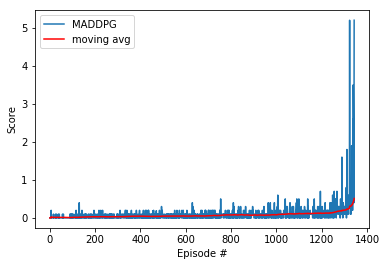

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='MADDPG')
plt.plot(np.arange(len(scores)), avgs, c='r', label='moving avg')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

In [6]:
env.close()

## 5. Visulization

In [2]:
# import the libraries
from unityagents import UnityEnvironment
from collections import deque
from maddpg_agent import Agent

import matplotlib.pyplot as plt
import numpy as np
import random
import time
import torch

%matplotlib inline

In [3]:
# activate environment
env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# get the state size and action size to init the agent
num_agents = len(env_info.agents)
action_size = brain.vector_action_space_size
states = env_info.vector_observations
state_size = states.shape[1]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [4]:
# init agent 0/1
agent_0 = Agent(state_size, action_size, num_agents=1, random_seed=0)
agent_1 = Agent(state_size, action_size, num_agents=1, random_seed=0)

# load weights for agent 0/1
weights_actor_0 = torch.load('models/checkpoint_actor_0.pth')
weights_actor_1 = torch.load('models/checkpoint_actor_1.pth')

# load the weights to actor local
agent_0.actor_local.load_state_dict(weights_actor_0)
agent_1.actor_local.load_state_dict(weights_actor_1)

In [8]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        states = np.reshape(states, (1,48))
        action_0 = agent_0.act(states, add_noise=False)    # select an action (for each agent)
        action_1 = agent_1.act(states, add_noise=False)    # select an action (for each agent)
        actions = np.concatenate((action_0, action_1), axis=0)

        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)

        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 2.600000038743019
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 2.600000038743019
Score (max over agents) from episode 4: 0.10000000149011612
Score (max over agents) from episode 5: 2.600000038743019


In [9]:
env.close()